In [3]:
import numpy as np
from numpy import log
import matplotlib.pyplot as plt
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import scipy.optimize as optimize

import scipy.io
import random

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC



from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

In [4]:
def initCentroids(X, K):
    m = X.shape[0]
    randidx = np.random.permutation(m)
    return X[randidx[:K],:]

def findClosestCentroids(X, centroids):
    m = X.shape[0]
    K = centroids.shape[0]
    
    dist = np.zeros((m, K), dtype='float')
    for i in range(m):
        for j in range(K):
            dist[i,j] =  np.sum(np.square(X[i,:] - centroids[j,:]))
    closestCentroids = np.argmin(dist, axis=1)
    return closestCentroids.ravel()

def computeCentroids(X, idx, K):
    centroids = np.zeros((K, X.shape[1]))
    
    for k in range(K):
        idx_k = idx == k
        count = np.sum(idx_k)
        X_k = X * idx_k.reshape(-1,1)
        centroids[k,:] = np.sum(X_k, axis=0) / count
    return centroids

def runkMeans(X, initial_centroids, maxIter):
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    for i in range(maxIter):
        idx = findClosestCentroids(X, centroids);
        centroids = computeCentroids(X, idx, K);
    return (centroids, idx)

In [5]:
file = r'../data/ex7data2.mat'
print(scipy.io.whosmat(file))
mat = scipy.io.loadmat(file)
X = mat['X']

[('X', (300, 2), 'double')]


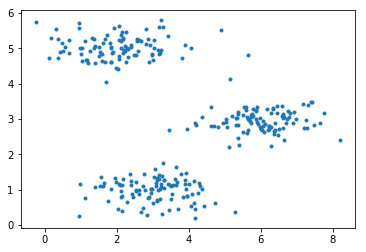

In [6]:
plt.scatter(X[:,0], X[:,1], marker='.')

In [7]:
n_clusters = 3
est = KMeans(n_clusters = n_clusters)
est.fit(X)
labels = est.labels_  ; print(labels)

[1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1]


In [8]:
initial_centroids = initCentroids(X, n_clusters)
(centroids, idx) = runkMeans(X, initial_centroids, 20)

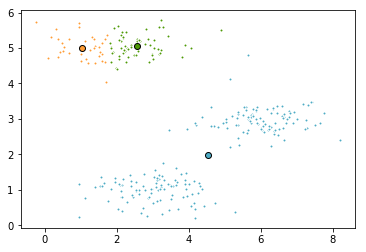

In [9]:
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
for k, col in zip(range(n_clusters), colors):
    my_members = idx == k
    cluster_center = centroids[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

In [10]:
file = r'../data/bird_small.mat'
print(scipy.io.whosmat(file))

[('A', (128, 128, 3), 'double')]


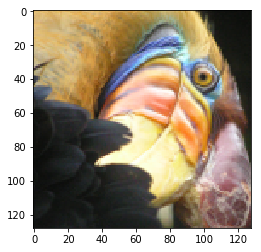

In [11]:
image_file = r'../data/bird_small.png'
im = np.array(Image.open(image_file), dtype=np.uint8)
plt.imshow(im)

In [16]:
K = 16
type(im)
A = im.reshape(-1, im.shape[2]); print(A.shape)

(16384, 3)


In [17]:
initial_centroids = initCentroids(A, K)
(centroids, idx) = runkMeans(A, initial_centroids, 10)

In [14]:
A_recovered = centroids[idx,:]
A_recovered = A_recovered.reshape(im.shape[0], im.shape[1], im.shape[2]).astype(dtype=np.uint8)
print(A_recovered.shape)
print(type(A_recovered))

(128, 128, 3)
<class 'numpy.ndarray'>


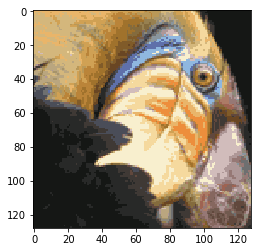

In [15]:
#im_less_color = Image.fromarray(A_recovered)
plt.imshow(A_recovered)